# This notebook plots figures that are used to analyse CASM dataset. 

Smaple data is provided if the size is < 25 mb. Otherwise, the relevant script used to create the necessary input data file on the cloud is referenced. 

List of the small files available to run this notebook:

1. cor_between_SMSMAP_FINAL_2015_2020.pkl
2. cor_between_SMSMAP_RESID_FINAL_2015_2020.pkl
3. VARS_2010_2020_May_for_MAP.pkl
4. VARS_2002-2010_JULY_for_MAP.pkl
5. VARS_2015_2020_FINAL_for_map.pkl
6. full_struct_July_for_map.pkl
7. rmse_resid_2015_2020_FINAL_for_MAP.pkl
8. rmse_unbiased_2015_2020_FINAL_for_MAP.pkl
9. rmse_full_2015_2020_FINAL_for_MAP.pkl
10. str_unc_all_years_AUG22_for_map.pkl
11. data_unc_all_years_AUG22_for_map.pkl
12. VARS_2010_2020_May_for_ts.pkl
13. VARS_2002-2010_JULY_for_ts.pkl
14. data_unc_2010_2020_may2022_for_ts.pkl
15. data_unc_2002-2010_AUG22_for_ts.pkl
16. resid_dif_2010_July_for_map.pkl
17. smap_space_bias.pkl

List of files that too large (>25 Mb) to be uploded to github that are used in this notebook:

1. smos1020_out_short_2010_2020_may_for_HOVEMOLLER.pkl
2. smap_for_pics.pkl
3. full_struct_July_only_sm.pkl

In [1]:
#import packages 

import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import scipy.signal as signal
from scipy.optimize import curve_fit
import statsmodels.api as stm
import seaborn as sns
from matplotlib.gridspec import GridSpec
import itertools
import datetime
from mpl_toolkits.axes_grid1 import ImageGrid

from scipy.stats import gaussian_kde



In [2]:
# create custom colormap

import matplotlib.colors as colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = plt.get_cmap('jet_r')
new_cmap = truncate_colormap(cmap, 0.2, 0.8)

In [4]:
file = '../some_data/cor_between_SMSMAP_FINAL_2015_2020.pkl' # datafile is available  
cor1 = pd.read_pickle(file)
cor1.head()

,lat,lon,level_2,str_mean
0,-55.177,-69.899,sm_am,0.932195
1,-55.177,-69.640,sm_am,0.857474
2,-55.177,-69.380,sm_am,0.912836
3,-55.177,-69.121,sm_am,0.884350
4,-55.177,-68.862,sm_am,-0.064947


In [5]:
file = '../some_data/cor_between_SMSMAP_RESID_FINAL_2015_2020.pkl' # datafile is available 
cor2 = pd.read_pickle(file)

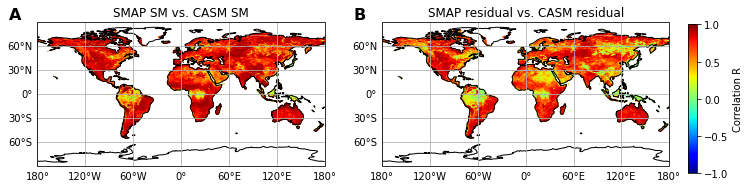

In [7]:
# plots correlation between CASM and SMAP during 2015-2020 for both full signal and the residual 

fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls = ax.gridlines(draw_labels=True)

sm = plt.scatter(x = cor1['lon'], y = cor1['lat'], c=cor1['str_mean'], s=1, cmap=plt.cm.jet, edgecolors=None, linewidth=0)
#cb = plt.colorbar(sm, shrink=0.6)
#cb.remove() 
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels

plt.title('SMAP SM vs. CASM SM')
ax.text(-0.1, 1.02, 'A', transform=ax.transAxes, size=16, weight='bold')


ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls = ax.gridlines(draw_labels=True)
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels

sm = plt.scatter(x = cor2['lon'], y = cor2['lat'], c=cor2['resid_mean'], s=1, cmap=plt.cm.jet, edgecolors=None, linewidth=0)
#cb = plt.colorbar(sm, shrink=0.6)
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
plt.title('SMAP residual vs. CASM residual')

ax.text(-0.1, 1.02, 'B', transform=ax.transAxes, size=16, weight='bold')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.38, 0.01, 0.23])
cb = fig.colorbar(sm, cax=cbar_ax)
cb.set_label('Correlation R')

plt.savefig('Correlations.png', bbox_inches='tight')


plt.show()

In [8]:
file = '../some_data/VARS_2010_2020_May_for_MAP.pkl' # datafile is available
map1 = pd.read_pickle(file)
map1.head()

,lat,lon,str_mean,str_std,covar
0,-55.177,-69.899,0.355907,0.002884,0.008329
1,-55.177,-69.640,0.305054,0.002340,0.007840
2,-55.177,-69.380,0.339371,0.002427,0.007399
3,-55.177,-69.121,0.362619,0.002585,0.007362
4,-55.177,-68.862,0.481838,0.002507,0.005198


In [9]:
file = '../some_data/VARS_2002-2010_JULY_for_MAP.pkl' # datafile is available
map2 = pd.read_pickle(file)
map2.head()

,lat,lon,str_mean,str_std,covar
0,-55.177,-69.899,0.350836,0.005468,0.016085
1,-55.177,-69.640,0.298069,0.005219,0.017952
2,-55.177,-69.380,0.331930,0.005037,0.015692
3,-55.177,-69.121,0.357336,0.004766,0.013684
4,-55.177,-68.862,0.481077,0.004507,0.009355


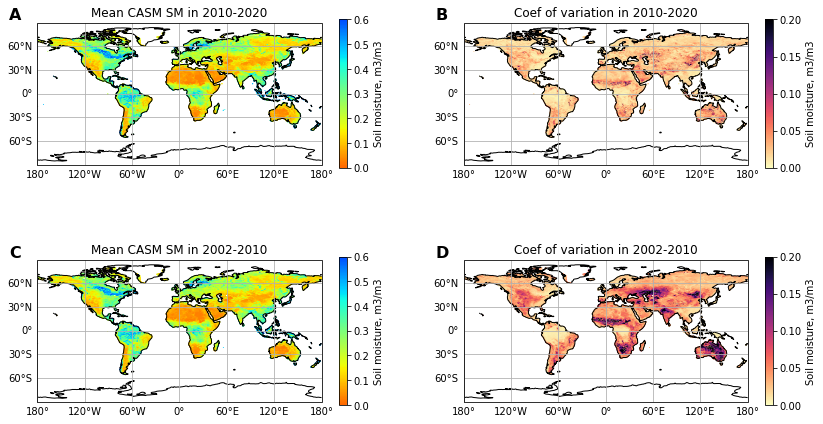

In [10]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls = ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map1['lon'], y = map1['lat'], c=map1['str_mean'], s=1, cmap=new_cmap, edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.6)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')
ax.text(-0.1, 1.02, 'A', transform=ax.transAxes, size=16, weight='bold')
plt.title('Mean CASM SM in 2010-2020')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels


ax = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls =ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map1['lon'], y = map1['lat'], c=map1['covar'], s=1, cmap='magma_r', edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.2)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')

plt.title('Coef of variation in 2010-2020')
ax.text(-0.1, 1.02, 'B', transform=ax.transAxes, size=16, weight='bold')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls =ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map2['lon'], y = map2['lat'], c=map2['str_mean'], s=1, cmap=new_cmap, edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.6)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
plt.title('Mean CASM SM in 2002-2010')

ax.text(-0.1, 1.02, 'C', transform=ax.transAxes, size=16, weight='bold')

ax = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls =ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map2['lon'], y = map2['lat'], c=map2['covar'], s=1, cmap='magma_r', edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.2)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels

plt.title('Coef of variation in 2002-2010')
ax.text(-0.1, 1.02, 'D', transform=ax.transAxes, size=16, weight='bold')



#plt.savefig('Mean_and_covar_separately.png', bbox_inches='tight')


#fig = plt.gcf()
plt.show()

In [11]:
file = '../some_data/VARS_2015_2020_FINAL_for_map.pkl' # datafile is available
map_s = pd.read_pickle(file)
map_s.head()

,lat,lon,str_mean,str_std,covar,sm_am,bias
0,-55.177,-69.899,0.354212,0.002838,0.008390,0.357183,-0.002970
1,-55.177,-69.640,0.304613,0.002344,0.007820,0.305877,-0.001264
2,-55.177,-69.380,0.338015,0.002376,0.007251,0.339224,-0.001209
3,-55.177,-69.121,0.360416,0.002512,0.007200,0.361722,-0.001306
4,-55.177,-68.862,0.481797,0.002567,0.005325,0.483064,-0.001267


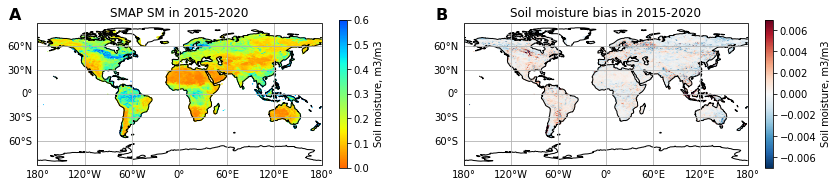

In [12]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls = ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map_s['lon'], y = map_s['lat'], c=map_s['sm_am'], s=1, cmap=new_cmap, edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.6)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels


plt.title('SMAP SM in 2015-2020')

ax.text(-0.1, 1.02, 'A', transform=ax.transAxes, size=16, weight='bold')

ax = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls = ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map_s['lon'], y = map_s['lat'], c=map_s['bias'], s=1, cmap='RdBu_r', edgecolors=None, linewidth=0)
sm.set_clim(-0.007, 0.007)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels



ax.text(-0.1, 1.02, 'B', transform=ax.transAxes, size=16, weight='bold')


#basename = os.path.basename(FILE_NAME)
plt.title('Soil moisture bias in 2015-2020')

plt.savefig('Compare_to_SMAP.png', dpi = 200, bbox_inches='tight')


#fig = plt.gcf()
plt.show()

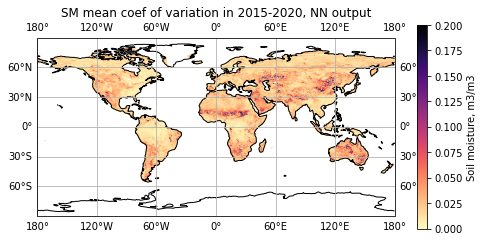

In [14]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map1['lon'], y = map1['lat'], c=map1['covar'], s=1, cmap='magma_r', edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.2)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')



#basename = os.path.basename(FILE_NAME)
plt.title('SM mean coef of variation in 2015-2020, NN output')
#plt.savefig('Aver_sm_2002_20.pdf', bbox_inches='tight')


#fig = plt.gcf()
plt.show()

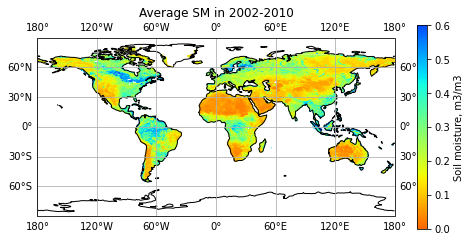

In [15]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map2['lon'], y = map2['lat'], c=map2['str_mean'], s=1, cmap=new_cmap, edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.6)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')



#basename = os.path.basename(FILE_NAME)
plt.title('Average SM in 2002-2010')
#plt.savefig('Aver_sm_2002_20.pdf', bbox_inches='tight')


#fig = plt.gcf()
plt.show()

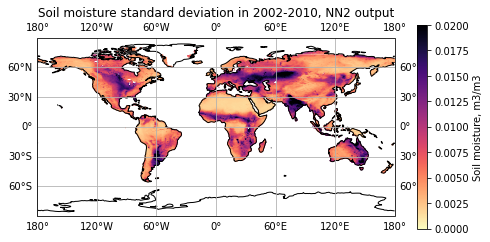

In [16]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map2['lon'], y = map2['lat'], c=map2['str_std'], s=1, cmap='magma_r', edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.02)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')



#basename = os.path.basename(FILE_NAME)
plt.title('Soil moisture standard deviation in 2002-2010, NN2 output')
#plt.savefig('Aver_sm_2002_20.pdf', bbox_inches='tight')


#fig = plt.gcf()
plt.show()

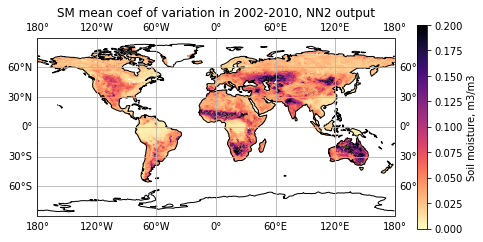

In [17]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map2['lon'], y = map2['lat'], c=map2['covar'], s=1, cmap='magma_r', edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.2)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')



#basename = os.path.basename(FILE_NAME)
plt.title('SM mean coef of variation in 2002-2010, NN2 output')
#plt.savefig('Aver_sm_2002_20.pdf', bbox_inches='tight')


#fig = plt.gcf()
plt.show()

In [18]:
file = '../some_data/full_struct_July_for_map.pkl'
map_f = pd.read_pickle(file)
map_f.head()

,lat,lon,str_mean,str_std,covar,resid_mean
0,-55.177,-69.899,0.354552,0.004104,0.011982,-0.002888
1,-55.177,-69.640,0.301952,0.003723,0.012690,-0.002945
2,-55.177,-69.380,0.335982,0.003692,0.011419,-0.002277
3,-55.177,-69.121,0.360842,0.003612,0.010325,-0.001692
4,-55.177,-68.862,0.481658,0.003454,0.007166,-0.001407


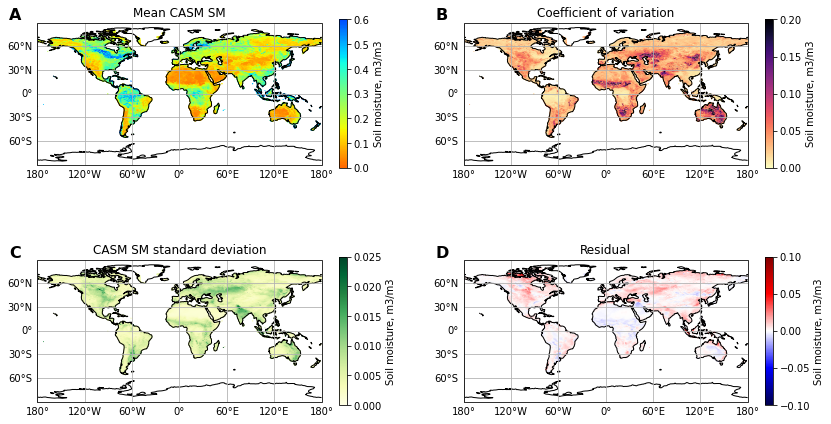

In [19]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls = ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map_f['lon'], y = map_f['lat'], c=map_f['str_mean'], s=1, cmap=new_cmap, edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.6)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')
ax.text(-0.1, 1.02, 'A', transform=ax.transAxes, size=16, weight='bold')
plt.title('Mean CASM SM')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels


ax = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls =ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map_f['lon'], y = map_f['lat'], c=map_f['covar'], s=1, cmap='magma_r', edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.2)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')

plt.title('Coefficient of variation')
ax.text(-0.1, 1.02, 'B', transform=ax.transAxes, size=16, weight='bold')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls =ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map_f['lon'], y = map_f['lat'], c=map_f['str_std'], s=1, cmap='YlGn', edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.025)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
plt.title('CASM SM standard deviation')

ax.text(-0.1, 1.02, 'C', transform=ax.transAxes, size=16, weight='bold')

ax = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls =ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map_f['lon'], y = map_f['lat'], c=map_f['resid_mean'], s=1, cmap='seismic', edgecolors=None, linewidth=0)
sm.set_clim(-0.1, 0.1)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels

plt.title('Residual')
ax.text(-0.1, 1.02, 'D', transform=ax.transAxes, size=16, weight='bold')



#plt.savefig('Mean_and_covar_separately.pdf', bbox_inches='tight')


#fig = plt.gcf()
plt.show()

In [20]:
file = '../some_data/rmse_resid_2015_2020_FINAL_for_MAP.pkl'
rm1 = pd.read_pickle(file)
rm1.head()

,lat,lon,0
0,-55.177,-69.899,0.021826
1,-55.177,-69.640,0.023659
2,-55.177,-69.380,0.024327
3,-55.177,-69.121,0.028923
4,-55.177,-68.862,0.015523


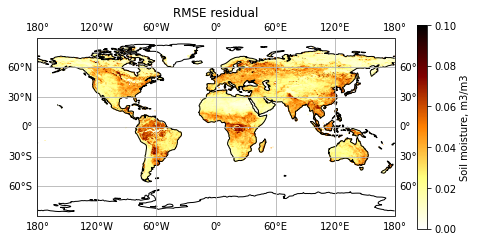

In [21]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
ax.gridlines(draw_labels=True)

sm = plt.scatter(x = rm1['lon'], y = rm1['lat'], c=rm1[0], s=1, cmap='afmhot_r', edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.1)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')



#basename = os.path.basename(FILE_NAME)
plt.title('RMSE residual')
#plt.savefig('Aver_sm_2002_20.pdf', bbox_inches='tight')


#fig = plt.gcf()
plt.show()

In [22]:
file = '../some_data/rmse_full_2015_2020_FINAL_for_MAP.pkl'
rm2 = pd.read_pickle(file)
rm2.head()

,lat,lon,0
0,-55.177,-69.899,0.021826
1,-55.177,-69.640,0.023659
2,-55.177,-69.380,0.024327
3,-55.177,-69.121,0.028923
4,-55.177,-68.862,0.015523


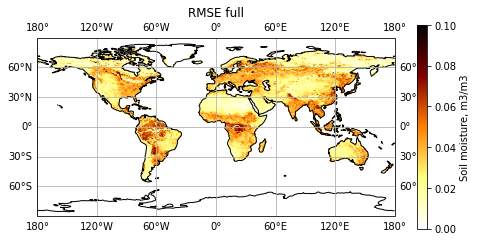

In [23]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
ax.gridlines(draw_labels=True)

sm = plt.scatter(x = rm2['lon'], y = rm2['lat'], c=rm2[0], s=1, cmap='afmhot_r', edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.1)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')



#basename = os.path.basename(FILE_NAME)
plt.title('RMSE full')
#plt.savefig('Aver_sm_2002_20.pdf', bbox_inches='tight')


#fig = plt.gcf()
plt.show()

In [24]:
file = '../some_data/rmse_unbiased_2015_2020_FINAL_for_MAP.pkl'
rm3 = pd.read_pickle(file)
rm3.head()

,lat,lon,0
0,-55.177,-69.899,0.021825
1,-55.177,-69.640,0.023634
2,-55.177,-69.380,0.024304
3,-55.177,-69.121,0.028908
4,-55.177,-68.862,0.015495


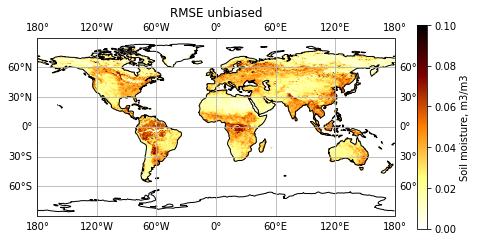

In [25]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
ax.gridlines(draw_labels=True)

sm = plt.scatter(x = rm3['lon'], y = rm3['lat'], c=rm3[0], s=1, cmap='afmhot_r', edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.1)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')



#basename = os.path.basename(FILE_NAME)
plt.title('RMSE unbiased')
#plt.savefig('Aver_sm_2002_20.pdf', bbox_inches='tight')


#fig = plt.gcf()
plt.show()

In [53]:
file1 = '../some_data/str_unc_all_years_AUG22_for_map.pkl'

map_un1 = pd.read_pickle(file1)
file2 = '../some_data/data_unc_all_years_AUG22_for_map.pkl'
map_un2 = pd.read_pickle(file2)
map_un1.head()

,lat,lon,str_mean,str_std
0,-55.177,-69.899,0.353538,0.004091
1,-55.177,-69.640,0.301707,0.003719
2,-55.177,-69.380,0.335797,0.003681
3,-55.177,-69.121,0.360146,0.003606
4,-55.177,-68.862,0.481482,0.003441


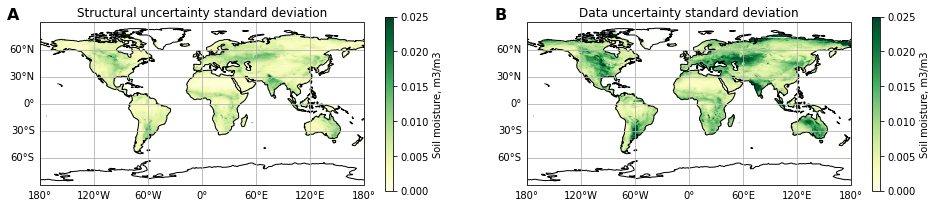

In [54]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls = ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map_un1['lon'], y = map_un1['lat'], c=map_un1['str_std'], s=1, cmap='YlGn', edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.025)
cb = plt.colorbar(sm, shrink=0.4)
cb.set_label('Soil moisture, m3/m3')
ax.text(-0.1, 1.02, 'A', transform=ax.transAxes, size=16, weight='bold')
plt.title('Structural uncertainty standard deviation')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels


ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls =ax.gridlines(draw_labels=True)

sm = plt.scatter(x = map_un2['lon'], y = map_un2['lat'], c=map_un2['data_std'], s=1, cmap='YlGn', edgecolors=None, linewidth=0)
sm.set_clim(0.0, 0.025)
cb = plt.colorbar(sm, shrink=0.4)
cb.set_label('Soil moisture, m3/m3')

plt.title('Data uncertainty standard deviation')
ax.text(-0.1, 1.02, 'B', transform=ax.transAxes, size=16, weight='bold')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels



#plt.savefig('Str_Data_unc_std_map.png', dpi = 300, bbox_inches='tight')


#fig = plt.gcf()
plt.show()

Time series are produced as 2 separate files here so that they are below 25mb size limit for github

In [28]:
file = '../some_data/VARS_2010_2020_May_for_ts.pkl'
ts1 = pd.read_pickle(file)
ts1['date'] = pd.to_datetime(ts1['date'])

In [29]:
file = '../some_data/VARS_2002-2010_JULY_for_ts.pkl'
ts2 = pd.read_pickle(file)
ts2['date'] = pd.to_datetime(ts2['date'])


In [30]:
full_ts = ts1.merge(ts2, how = 'outer', on ='date')
full_ts['str_mean'] =full_ts[['str_mean_x', 'str_mean_y']].mean(axis = 1)
full_ts['str_std'] =full_ts[['str_std_x', 'str_std_y']].mean(axis = 1)
full_ts['range_min'] =full_ts[['range_min_x', 'range_min_y']].mean(axis = 1)
full_ts['range_max'] =full_ts[['range_max_x', 'range_max_y']].mean(axis = 1)

full_ts = full_ts.drop(['str_mean_x', 'str_mean_y', 'str_std_x', 'str_std_y', 'range_min_x', 'range_min_y', 'range_max_x', 'range_max_y'], axis=1)
full_ts = full_ts.sort_values(by='date')
full_ts = full_ts.dropna()


full_ts.tail()

,date,str_mean,str_std,range_min,range_max
1279,2020-08-19,0.188954,0.002932,0.186022,0.191886
1280,2020-08-22,0.192546,0.003049,0.189497,0.195596
1281,2020-08-25,0.190234,0.003088,0.187146,0.193322
1282,2020-08-28,0.191540,0.003135,0.188405,0.194675
1283,2020-08-31,0.189781,0.003552,0.186229,0.193334


In [31]:
sm12 = pd.to_datetime('2010-01-17', format='%Y-%m-%d')
sm2 = pd.to_datetime('2010-02-17', format='%Y-%m-%d')
sm13 = pd.to_datetime('2011-09-15', format='%Y-%m-%d')
sm3 = pd.to_datetime('2011-12-03', format='%Y-%m-%d')


In [32]:
full1 = full_ts[full_ts['date']<=sm2]
full2 = full_ts[full_ts['date']>sm12]
full2 = full2[full2['date']<sm3]
full3 = full_ts[full_ts['date']>=sm13]

In [46]:
#smoothing for plotting
pd.options.mode.chained_assignment = None  # default='warn'


lowess_nd = stm.nonparametric.lowess(full1['range_min'], full1['date'], frac=0.02)
lowess_sd = stm.nonparametric.lowess(full1['range_max'], full1['date'], frac=0.02)
lowess_md = stm.nonparametric.lowess(full1['str_mean'], full1['date'], frac=0.02)


full1['low'] = lowess_nd[:,1]
full1['up'] = lowess_sd[:,1]
full1['mean'] = lowess_md[:,1]

In [48]:

lowess_nd = stm.nonparametric.lowess(full2['range_min'], full2['date'], frac=0.085)
lowess_sd = stm.nonparametric.lowess(full2['range_max'], full2['date'], frac=0.085)
lowess_md = stm.nonparametric.lowess(full2['str_mean'], full2['date'], frac=0.085)


full2['low'] = lowess_nd[:,1]
full2['up'] = lowess_sd[:,1]
full2['mean'] = lowess_md[:,1]

In [49]:
lowess_nd = stm.nonparametric.lowess(full3['range_min'], full3['date'], frac=0.017)
lowess_sd = stm.nonparametric.lowess(full3['range_max'], full3['date'], frac=0.017)
lowess_md = stm.nonparametric.lowess(full3['str_mean'], full3['date'], frac=0.017)


full3['low'] = lowess_nd[:,1]
full3['up'] = lowess_sd[:,1]
full3['mean'] = lowess_md[:,1]

In [50]:
temp_unc = full1
temp_unc2 = full2
temp_unc3 = full3

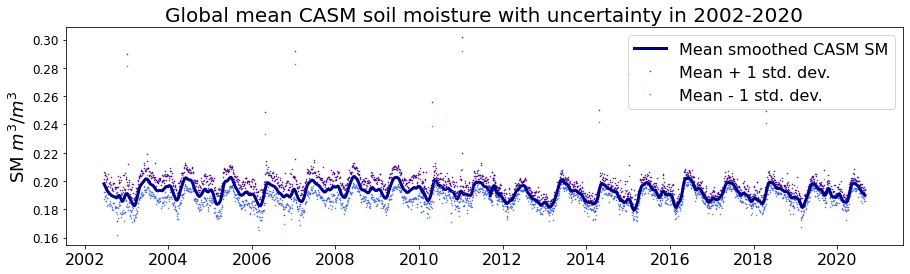

In [52]:
fig = plt.figure(figsize=(15, 4))#
plt.plot(temp_unc2['date'], temp_unc2['mean'],  linewidth = 3, color = 'darkblue', label = 'Mean smoothed CASM SM')


plt.plot(temp_unc['date'], temp_unc['range_max'], '.', markersize= 1, color = 'indigo', label = 'Mean + 1 std. dev.')
plt.plot(temp_unc2['date'], temp_unc2['range_max'], '.', markersize= 1, color = 'indigo')
plt.plot(temp_unc3['date'], temp_unc3['range_max'], '.', markersize= 1, color = 'indigo')
plt.plot(temp_unc['date'], temp_unc['range_min'], '.', markersize= 1, color = 'royalblue', label = 'Mean - 1 std. dev.')
plt.plot(temp_unc2['date'], temp_unc2['range_min'], '.', markersize= 1, color = 'royalblue')
plt.plot(temp_unc3['date'], temp_unc3['range_min'], '.', markersize= 1, color = 'royalblue')
plt.plot(temp_unc['date'], temp_unc['mean'],  linewidth = 3, color = 'darkblue')
plt.plot(temp_unc3['date'], temp_unc3['mean'],  linewidth = 3, color = 'darkblue')

plt.legend(loc = 'upper right', fontsize=16)
#plt.xlabel('Date',  fontsize=20)
plt.ylabel('SM $m^3/m^3$',  fontsize=18)
plt.xticks(fontsize=16 )
plt.yticks(fontsize=12 )


plt.title('Global mean CASM soil moisture with uncertainty in 2002-2020',  fontsize=20)
#plt.savefig('illustation.jpg',  dpi = 300, bbox_inches='tight')


plt.show()



In [57]:
file = '../some_data/data_unc_2010_2020_may2022_for_ts.pkl'
tsd1 = pd.read_pickle(file)
tsd1['date'] = pd.to_datetime(tsd1['date'])
tsd1 = tsd1.drop(['range_2min', 'range_2max'], axis=1)


In [58]:
file = '../some_data/data_unc_2002-2010_AUG22_for_ts.pkl'
tsd2 = pd.read_pickle(file)
tsd2['date'] = pd.to_datetime(tsd2['date'])


In [59]:
full_tsd = pd.merge(tsd2, tsd1,  on ='date', how = 'outer')
full_tsd['data_mean'] =full_tsd[['data_mean_x', 'data_mean_y']].mean(axis = 1)
full_tsd['data_std']  =full_tsd[['data_std_x', 'data_std_y']].mean(axis = 1)
full_tsd['range_min'] =full_tsd[['range_min_x', 'range_min_y']].mean(axis = 1)
full_tsd['range_max'] =full_tsd[['range_max_x', 'range_max_y']].mean(axis = 1)

full_tsd = full_tsd.drop(['data_mean_x', 'data_mean_y', 'data_std_x', 'data_std_y', 'range_min_x', 'range_min_y', 'range_max_x', 'range_max_y'], axis=1)
full_tsd = full_tsd.sort_values(by='date')
full_tsd = full_tsd.dropna()


full_tsd.head()

,date,data_mean,data_std,range_min,range_max
0,2002-06-19,0.203155,0.011784,0.191371,0.214939
1,2002-06-22,0.199189,0.012083,0.187106,0.211272
2,2002-06-25,0.201519,0.011880,0.189639,0.213400
3,2002-06-28,0.200379,0.013334,0.187045,0.213713
4,2002-07-01,0.203081,0.014415,0.188666,0.217496


In [60]:
fulld1 = full_tsd[full_tsd['date']<=sm2]
fulld2 = full_tsd[full_tsd['date']>sm12]
fulld2 = fulld2[fulld2['date']<sm3]
fulld3 = full_tsd[full_tsd['date']>=sm13]

In [61]:
lowess_nd = stm.nonparametric.lowess(fulld1['range_min'], fulld1['date'], frac=0.02)
lowess_sd = stm.nonparametric.lowess(fulld1['range_max'], fulld1['date'], frac=0.02)
lowess_md = stm.nonparametric.lowess(fulld1['data_mean'], fulld1['date'], frac=0.02)


fulld1['low'] = lowess_nd[:,1]
fulld1['up'] = lowess_sd[:,1]
fulld1['mean'] = lowess_md[:,1]

In [62]:
lowess_nd = stm.nonparametric.lowess(fulld2['range_min'], fulld2['date'], frac=0.085)
lowess_sd = stm.nonparametric.lowess(fulld2['range_max'], fulld2['date'], frac=0.085)
lowess_md = stm.nonparametric.lowess(fulld2['data_mean'], fulld2['date'], frac=0.085)


fulld2['low'] = lowess_nd[:,1]
fulld2['up'] = lowess_sd[:,1]
fulld2['mean'] = lowess_md[:,1]

In [63]:

lowess_nd = stm.nonparametric.lowess(fulld3['range_min'], fulld3['date'], frac=0.017)
lowess_sd = stm.nonparametric.lowess(fulld3['range_max'], fulld3['date'], frac=0.017)
lowess_md = stm.nonparametric.lowess(fulld3['data_mean'], fulld3['date'], frac=0.017)


fulld3['low'] = lowess_nd[:,1]
fulld3['up'] = lowess_sd[:,1]
fulld3['mean'] = lowess_md[:,1]

In [64]:
temp_uncd = fulld1
temp_uncd2 = fulld2
temp_uncd3 = fulld3


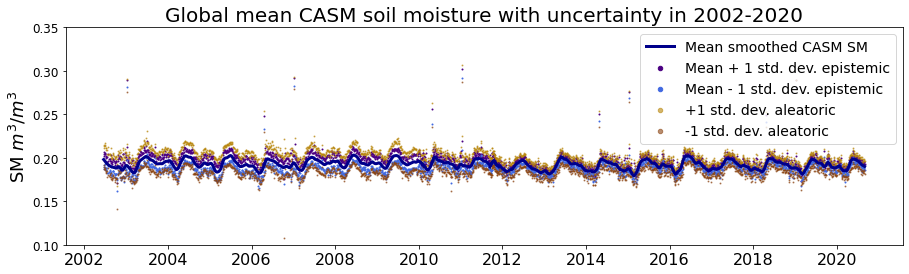

In [65]:
fig = plt.figure(figsize=(15, 4))#
plt.plot(temp_unc2['date'], temp_unc2['mean'],  linewidth = 3, color = 'darkblue', label = 'Mean smoothed CASM SM')
plt.plot(temp_unc['date'], temp_unc['mean'],  linewidth = 3, color = 'darkblue')
plt.plot(temp_unc3['date'], temp_unc3['mean'],  linewidth = 3, color = 'darkblue')
plt.scatter(temp_unc['date'], temp_unc['range_max'],  s= 1, color = 'indigo', label = 'Mean + 1 std. dev. epistemic')
plt.scatter(temp_unc2['date'], temp_unc2['range_max'],  s= 1, color = 'indigo')
plt.scatter(temp_unc3['date'], temp_unc3['range_max'],  s= 1, color = 'indigo')
plt.scatter(temp_unc['date'], temp_unc['range_min'],  s= 1, color = 'royalblue', label = 'Mean - 1 std. dev. epistemic')
plt.scatter(temp_unc2['date'], temp_unc2['range_min'],  s= 1, color = 'royalblue')
plt.scatter(temp_unc3['date'], temp_unc3['range_min'], s= 1, color = 'royalblue')
plt.scatter(temp_uncd['date'], temp_uncd['range_max'],  s = 1, color = 'darkgoldenrod', alpha = 0.6, label = '+1 std. dev. aleatoric')
plt.scatter(temp_uncd2['date'], temp_uncd2['range_max'], s = 1, color = 'darkgoldenrod', alpha = 0.6)
plt.scatter(temp_uncd3['date'], temp_uncd3['range_max'], s = 1, color = 'darkgoldenrod', alpha = 0.6)
plt.scatter(temp_uncd['date'], temp_uncd['range_min'], s = 1, color = 'saddlebrown',  alpha = 0.6, label = '-1 std. dev. aleatoric')
plt.scatter(temp_uncd2['date'], temp_uncd2['range_min'], s = 1, color = 'saddlebrown', alpha = 0.6)
plt.scatter(temp_uncd3['date'], temp_uncd3['range_min'], s = 1, color = 'saddlebrown', alpha = 0.6)
lgnd = plt.legend(loc = 'upper right', scatterpoints=1, fontsize=14)
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]
lgnd.legendHandles[3]._sizes = [20]
lgnd.legendHandles[4]._sizes = [20]
plt.ylim([0.1, 0.35])
#plt.xlabel('Date',  fontsize=20)
plt.ylabel('SM $m^3/m^3$',  fontsize=18)
plt.xticks(fontsize=16 )
plt.yticks(fontsize=12 )


plt.title('Global mean CASM soil moisture with uncertainty in 2002-2020',  fontsize=20)
#plt.savefig('2unc.jpg',  dpi = 300, bbox_inches='tight')


plt.show()

In [66]:
file = '../some_data/resid_dif_2010_July_for_map.pkl' 
space = pd.read_pickle(file)
space.head()

,lat,lon,resid_mean_x,resid_mean_y,difer
0,-55.177,-69.899,-0.006013,-0.000649,-0.005364
1,-55.177,-69.640,-0.005363,-0.001146,-0.004217
2,-55.177,-69.380,-0.003935,-0.001028,-0.002907
3,-55.177,-69.121,-0.003331,-0.000469,-0.002862
4,-55.177,-68.862,-0.002198,-0.000834,-0.001363


In [69]:
# separate SMAP data to before and after 2018. Need the large SMAP file for that. Only the result of this cell is available due to size limit
#sm3 = pd.to_datetime('2018-01-01', format='%Y-%m-%d')

#before2017 = smap[smap['date']<sm3].copy()
#after2017 = smap[smap['date']>sm3].copy()
#before_space2 = before2017.groupby(['lat', 'lon'])['dev_sm'].mean()
#before_space2 = before_space2.reset_index()
#after_space2 = after2017.groupby(['lat', 'lon'])['dev_sm'].mean()
#after_space2 = after_space2.reset_index()
#space2 = pd.merge(before_space2, after_space2, on =['lat', 'lon'])
#space2['difer'] = space2['dev_sm_x']-space2['dev_sm_y']
#space2.to_pickle('smap_space_bias.pkl', protocol = 4)

In [71]:
file = 'smap_space_bias.pkl' 
space2 = pd.read_pickle(file)
space2.head()

,lat,lon,dev_sm_x,dev_sm_y,difer
0,-55.177,-69.899,-0.000242,0.000635,-0.000876
1,-55.177,-69.640,-0.000872,0.001242,-0.002114
2,-55.177,-69.380,-0.000991,0.001266,-0.002257
3,-55.177,-69.121,0.001072,-0.001057,0.002128
4,-55.177,-68.862,0.000002,-0.000002,0.000004


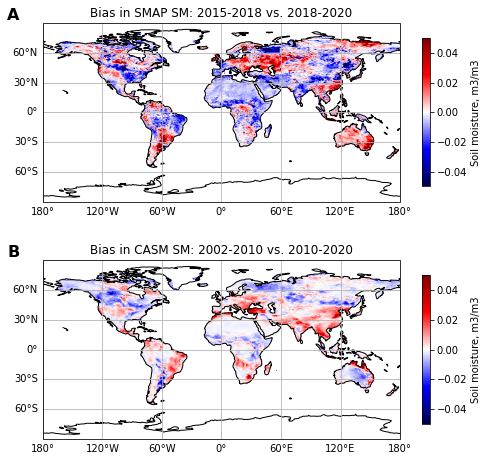

In [72]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(2, 1, 1, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls = ax.gridlines(draw_labels=True)

sm = plt.scatter(x = space2['lon'], y = space2['lat'], c=space2['difer'], s=1, cmap='seismic', edgecolors=None, linewidth=0)
sm.set_clim(-0.05, 0.05)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')
ax.text(-0.1, 1.02, 'A', transform=ax.transAxes, size=16, weight='bold')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels


#basename = os.path.basename(FILE_NAME)
plt.title('Bias in SMAP SM: 2015-2018 vs. 2018-2020')
#plt.savefig('Aver_sm_2002_20.pdf', bbox_inches='tight')
ax = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())

ax.set_global()

ax.coastlines()
gls = ax.gridlines(draw_labels=True)

sm = plt.scatter(x = space['lon'], y = space['lat'], c=space['difer'], s=1, cmap='seismic', edgecolors=None, linewidth=0)
sm.set_clim(-0.05, 0.05)
cb = plt.colorbar(sm, shrink=0.75)
cb.set_label('Soil moisture, m3/m3')
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels

ax.text(-0.1, 1.02, 'B', transform=ax.transAxes, size=16, weight='bold')




#basename = os.path.basename(FILE_NAME)
plt.title('Bias in CASM SM: 2002-2010 vs. 2010-2020')

plt.savefig('spatial_biases.png', bbox_inches='tight')
#fig = plt.gcf()
plt.show()

In [ ]:
def grid_for_HM(data, col_name):
    datemin = np.min(data['date'])
    datemax = np.max(data['date'])
    x_lims11 = [datemin, datemax]
    x_lims11 = mdates.date2num(x_lims11)
    lats11 = np.unique(data['lat'])
    data11_g = data.groupby(['lat', 'date'])[col_name].mean()
    data_grid11 = data11_g.unstack('date')
    grid11 = data_grid11.values
    grid11 = np.flipud(grid11 )
    return x_lims11, lats11, grid11



In [7]:
file = '../some_data/smos1020_out_short_2010_2020_may_for_HOVEMOLLER.pkl'  # file is NOT provided - too large
amsr2 = pd.read_pickle(file)
amsr2 = amsr2[['lat', 'lon', 'date', 'str_mean', 'resid_mean']]
amsr2.head()

,lat,lon,date,str_mean,resid_mean
0,-55.177,-69.899,2010-01-17,0.404757,-0.023193
1,-55.177,-69.640,2010-01-17,0.336885,-0.018027
2,-55.177,-69.380,2010-01-17,0.395456,-0.009946
3,-55.177,-68.862,2010-01-17,0.478422,-0.004647
4,-55.177,-68.602,2010-01-17,0.430198,0.001424


In [8]:
file = '../some_data/full_struct_July_only_sm.pkl' 
amsr = pd.read_pickle(file)
amsr.head()

,lat,lon,date,str_mean
0,-55.177,-69.899,2002-06-19,0.292888
1,47.394,-82.349,2002-06-19,0.536642
2,-24.346,-60.562,2002-06-19,0.473172
3,47.394,-82.089,2002-06-19,0.541695
4,47.394,-81.830,2002-06-19,0.544478


In [4]:
amsr = amsr.dropna()
data11 = amsr[['lat', 'lon', 'date', 'str_mean']]
dx_lims11, lats11,  grid11 = grid_for_HM(data11, 'str_mean')

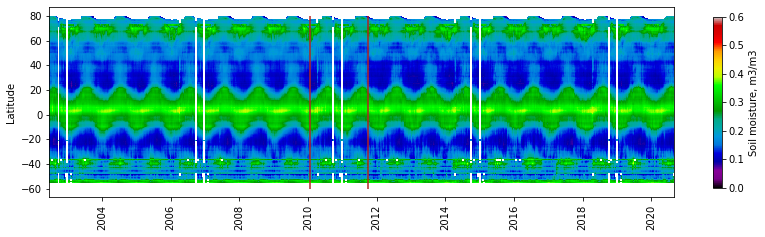

In [8]:
fig=plt.figure(figsize=(14,3.5))
sm_11 = pd.to_datetime('2010-01-17', format='%Y-%m-%d')
sm_22 = pd.to_datetime('2011-10-03', format='%Y-%m-%d')




#gs=GridSpec(1,1, wspace=0.1) # 2 rows, 3 columns

ax=fig.add_subplot(1, 1, 1)
grid11 = np.flipud(grid11 )


img_colors =ax.imshow(grid11, extent=(x_lims11[0], x_lims11[1], lats11[0], lats11[-1]), vmin=0, vmax=0.6, cmap='nipy_spectral', aspect='auto')
#fig.colorbar(img_colors, ax=ax)
#ax.set_title('no scaling')
plt.vlines(sm_11, -60, 80, colors='firebrick')
plt.vlines(sm_22, -60, 80, colors='firebrick')



ax.set_ylabel('Latitude ')
#ax.set_xticks([16867.5, 17210.0, 17552.5, 17895.0] )
ax.xaxis_date()
ax.set_xlabel('')

ax.tick_params(axis='x', rotation=90)
#ax.text(-0.05, 1.02, 'A', transform=ax.transAxes, size=20, weight='bold')
cb = plt.colorbar(img_colors, shrink=0.9)
cb.set_label('Soil moisture, m3/m3')
plt.savefig('holm_all.pdf', bbox_inches='tight')



In [17]:
sm_3 = pd.to_datetime('2015-03-30', format='%Y-%m-%d')
amsr2 = amsr2[amsr2['date']>sm_3]


In [3]:
file = '../some_data/smos1020_out_short_2002-2010_JULY_for_HOVEMOLLER.pkl' 
amsr = pd.read_pickle(file)

In [4]:
amsr = amsr[['lat', 'lon', 'date', 'str_mean']]
amsr.head()

,lat,lon,date,str_mean
0,-55.177,-69.899,2002-06-19,0.292888
1,-55.177,-69.899,2002-06-22,0.289032
2,-55.177,-69.899,2002-06-25,0.287408
3,-55.177,-69.899,2002-06-28,0.306167
4,-55.177,-69.899,2002-07-01,0.294754


In [4]:
file = '../some_data/smap_for_pics.pkl'  # this file is too large
smap = pd.read_pickle(file)

data11 = smap[['lat', 'lon', 'date', 'sm_am']]
x_lims11, lats11,  grid11 = grid_for_HM(data11, 'sm_am')

In [12]:
data12 = smap[['lat', 'lon', 'date', 'sm_am_seas_med']]
x_lims12, lats12,  grid12 = grid_for_HM(data12, 'sm_am_seas_med')

In [9]:
data13 = smap[['lat', 'lon', 'date', 'dev_sm']]

dx_lims13, lats13,  grid13 = grid_for_HM(data13, 'dev_sm')

In [17]:
data14 = amsr2[['lat', 'lon', 'date', 'str_mean']]
data14 = data14[data14['date']>pd.to_datetime('2015-03-31', format='%Y-%m-%d')]
dx_lims14, lats14,  grid14 = grid_for_HM(data14, 'str_mean')

In [18]:
data15 = amsr2[['lat', 'lon', 'date', 'resid_mean']]
data15 = data15[data15['date']>pd.to_datetime('2015-03-31', format='%Y-%m-%d')]


dx_lims15, lats15,  grid15 = grid_for_HM(data15, 'resid_mean')

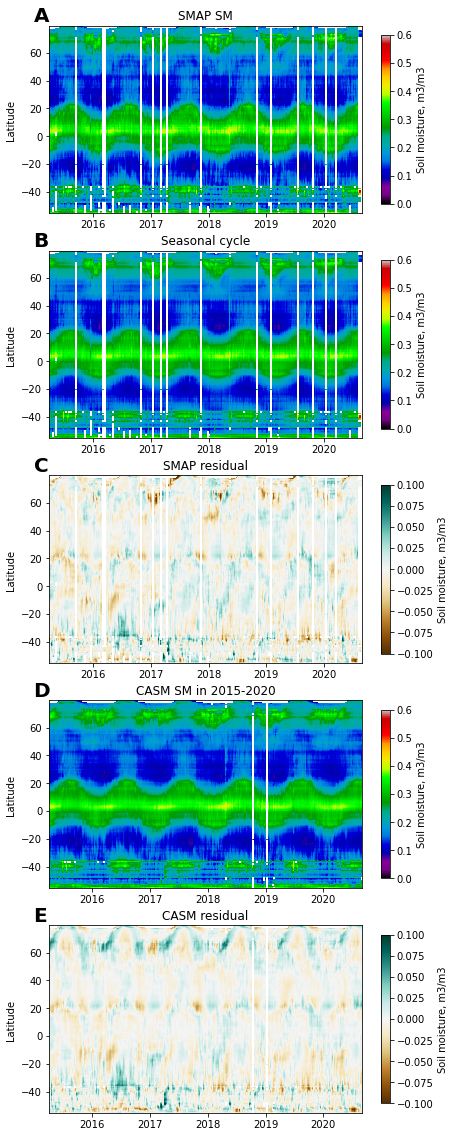

In [19]:
fig=plt.figure(figsize=(7,20))

gs=GridSpec(5,1, wspace=0.1) 

ax=fig.add_subplot(gs[0,0]) 

img_colors =ax.imshow(grid11, extent=(x_lims11[0], x_lims11[1], lats11[0], lats11[-1]), vmin=0, vmax=0.6, cmap='nipy_spectral', aspect='auto')
ax.set_title('SMAP SM')
ax.set_ylabel('Latitude ')
ax.xaxis_date()
ax.set_xlabel('')

ax.tick_params(axis='x')
ax.text(-0.05, 1.02, 'A', transform=ax.transAxes, size=20, weight='bold')
cb = plt.colorbar(img_colors, shrink=0.9)
cb.set_label('Soil moisture, m3/m3')



ax=fig.add_subplot(gs[1,0]) 
img_colors =ax.imshow(grid12, extent=(x_lims12[0], x_lims12[1], lats12[0], lats12[-1]), vmin=0, vmax=0.6, cmap='nipy_spectral', aspect='auto')
ax.set_title('Seasonal cycle')
ax.set_ylabel('Latitude ')
ax.xaxis_date()
ax.set_xlabel('')

ax.tick_params(axis='x')
ax.text(-0.05, 1.02, 'B', transform=ax.transAxes, size=20, weight='bold')
cb = plt.colorbar(img_colors, shrink=0.9)
cb.set_label('Soil moisture, m3/m3')



ax=fig.add_subplot(gs[2,0]) 
img_colors =ax.imshow(grid13, extent=(dx_lims13[0], dx_lims13[1], lats13[0], lats13[-1]),  cmap='BrBG', aspect='auto')
img_colors.set_clim(-0.1, 0.1)

ax.set_title('SMAP residual')
ax.set_ylabel('Latitude ')
ax.xaxis_date()
ax.set_xlabel('')

ax.tick_params(axis='x')
ax.text(-0.05, 1.02, 'C', transform=ax.transAxes, size=20, weight='bold')
cb = plt.colorbar(img_colors, shrink=0.9)
cb.set_label('Soil moisture, m3/m3')



ax=fig.add_subplot(gs[3,0]) 
img_colors =ax.imshow(grid14, extent=(dx_lims14[0], dx_lims14[1], lats14[0], lats14[-1]), vmin=0, vmax=0.6, cmap='nipy_spectral', aspect='auto')
ax.set_title('CASM SM in 2015-2020')
ax.set_ylabel('Latitude ')
ax.xaxis_date()
ax.set_xlabel('')

ax.tick_params(axis='x')
ax.text(-0.05, 1.02, 'D', transform=ax.transAxes, size=20, weight='bold')
cb = plt.colorbar(img_colors, shrink=0.9)
cb.set_label('Soil moisture, m3/m3')



ax=fig.add_subplot(gs[4,0])
img_colors =ax.imshow(grid15, extent=(dx_lims15[0], dx_lims15[1], lats15[0], lats15[-1]),  cmap='BrBG', aspect='auto')
img_colors.set_clim(-0.1, 0.1)


ax.set_title('CASM residual')
ax.set_ylabel('Latitude ')
ax.xaxis_date()
ax.set_xlabel('')

ax.tick_params(axis='x')
ax.text(-0.05, 1.02, 'E', transform=ax.transAxes, size=20, weight='bold')
cb = plt.colorbar(img_colors, shrink=0.9)
cb.set_label('Soil moisture, m3/m3')


#plt.savefig('compare_to_smap_hove.pdf', bbox_inches='tight')
plt.show()

